### ДЗ к Уроку 4

## Когортный анализ
На основе данных по продажам за 16 и 17 год на основе когортного анализа по дате первой покупки спрогнозировать товарооборот января 2018 года (с выводом кэфов поведения когротны по порядковому номеру месяца)

## Решение

### Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

pd.set_option('max_columns', 50)
mpl.rcParams['lines.linewidth'] = 2

# это чтобы графики строились непосредственно в блокноте iPython
%matplotlib inline 

In [2]:
df = pd.read_csv('D:/GeekBrains/Database for analytics/orders_20190822.csv', sep=";", decimal=",", parse_dates=["o_date"])

In [3]:
data = df.copy()

In [4]:
# Добавим столбец OrderPeriod для дальнейшей группировки данных
data['OrderPeriod'] = data.o_date.apply(lambda x: x.strftime('%Y-%m'))
data.set_index('user_id', inplace=True) #добавим индекс в dataFrame по id_o

In [5]:
data['JoinMonth'] = data.groupby(level=0)['o_date'].min().apply(lambda x: x.strftime('%Y-%m')) #добавим столбец JoinMonth
data.reset_index(inplace=True) #переиндексируем 

In [6]:
#создадим столбец в котором далее поместим количество заказов
data.insert(len(data.columns), "TotalOrders", 0, allow_duplicates=False) 

In [7]:
#свернем данные в когорты
grouped = data.groupby(['JoinMonth', 'OrderPeriod'])

In [8]:
# количество уникальных пользователей и общее количество заказов и выручка за период
cohorts = grouped.agg({'user_id': pd.Series.nunique,
                       'TotalOrders': pd.Series.count, 
                       'price': np.sum})

In [9]:
cohorts.rename(columns={'user_id': 'TotalUsers',
                        'price': 'TotalPrice'}, inplace=True)

In [10]:
# добавим ярлык для периодов
def cohort_period(df):
    df['CohortPeriod'] = np.arange(len(df)) + 1
    return df

In [11]:
cohorts = cohorts.groupby(level=0).apply(cohort_period)

In [12]:
cohorts

TotalUsers  TotalOrders    TotalPrice  CohortPeriod
JoinMonth OrderPeriod                                                     
2016-01   2016-01           41624        53246  1.125203e+08             1
          2016-02            6042        11663  2.399229e+07             2
          2016-03            6954        14551  2.670901e+07             3
          2016-04            6953        14925  2.760588e+07             4
          2016-05            6543        14558  2.692610e+07             5
          2016-06            6180        13410  2.537654e+07             6
          2016-07            5854        12420  2.390078e+07             7
          2016-08            6210        13901  2.751540e+07             8
          2016-09            6435        13925  2.770282e+07             9
          2016-10            6522        14945  3.173750e+07            10
          2016-11            6908        15412  3.209982e+07            11
          2016-12            6545        15501  3.122260e+07            12
          2017-01            4510         9259  2.039828e+07            13
          2017-02            3577         7148  1.604478e+07            14
          2017-03            3857         8330  1.975414e+07            15
          2017-04            3542         7451  1.679159e+07            16
          2017-05            3767         8259  1.793703e+07            17
          2017-06            3485         7143  1.629691e+07            18
          2017-07            3292         6410  1.492969e+07            19
          2017-08            3100         6166  1.498019e+07            20
          2017-09            2988         5893  1.471805e+07            21
          2017-10            3471         6579  1.642521e+07            22
          2017-11            3816         7394  1.765505e+07            23
          2017-12            3681         6952  1.521649e+07            24
2016-02   2016-02           31406        35716  7.665997e+07             1
          2016-03            3645         5569  9.375085e+06             2
          2016-04            3506         5446  9.920994e+06             3
          2016-05            3406         5531  9.263220e+06             4
          2016-06            3135         5048  8.567222e+06             5
          2016-07            3095         4881  8.446283e+06             6
...                           ...          ...           ...           ...
2017-05   2017-11            2064         2708  6.541266e+06             7
          2017-12            1996         2660  6.089623e+06             8
2017-06   2017-06           41416        45025  1.101232e+08             1
          2017-07            1635         2097  5.342939e+06             2
          2017-08            1488         1899  4.627360e+06             3
          2017-09            1372         1719  4.492804e+06             4
          2017-10            1503         1921  4.980216e+06             5
          2017-11            1716         2198  5.231269e+06             6
          2017-12            1671         2261  5.305373e+06             7
2017-07   2017-07           42249        45895  1.133869e+08             1
          2017-08            1469         1809  4.838056e+06             2
          2017-09            1301         1653  4.144890e+06             3
          2017-10            1462         1833  5.011416e+06             4
          2017-11            1719         2197  5.775162e+06             5
          2017-12            1609         2092  4.658876e+06             6
2017-08   2017-08           43326        46861  1.170630e+08             1
          2017-09            1379         1698  4.746666e+06             2
          2017-10            1352         1691  4.241016e+06             3
          2017-11            1554         1962  4.898571e+06             4
          2017-12            1502         1900  4.585101e+06             5
2017-09   2017-09           41385        44505  

In [16]:
#посчитаем retention
cohorts.reset_index(inplace=True)
cohorts.set_index(['JoinMonth','CohortPeriod'], inplace=True)

In [17]:
# создадим ряд содержаший размер каждой когорты JoinMonth
cohort_group_size = cohorts['TotalUsers'].groupby(level=0).first()
cohorts['TotalUsers'].unstack(0)
user_retention = cohorts['TotalUsers'].unstack(0).divide(cohort_group_size, axis=1)

In [18]:
user_retention

JoinMonth,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
CohortPeriod,,,,,,,,,,,,,,,,,,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
2,0.145157,0.116061,0.103424,0.083511,0.069499,0.060619,0.059314,0.052212,0.051132,0.046562,0.045377,0.033423,0.058537,0.059321,0.051729,0.051826,0.041713,0.039477,0.034770,0.031828,0.037381,0.038958,0.035531,NaN
3,0.167067,0.111635,0.091750,0.070231,0.059806,0.061676,0.052098,0.054285,0.053831,0.042812,0.031866,0.025685,0.062602,0.050360,0.052667,0.042653,0.037468,0.035928,0.030794,0.031205,0.036124,0.034272,NaN,NaN
4,0.167043,0.108451,0.085752,0.068769,0.061648,0.060020,0.054809,0.056231,0.049107,0.031234,0.024649,0.027349,0.058245,0.057251,0.047762,0.042653,0.036537,0.033127,0.034604,0.035868,0.034481,NaN,NaN,NaN
5,0.157193,0.099822,0.078274,0.071869,0.063199,0.063403,0.056252,0.054668,0.034292,0.024640,0.027336,0.025118,0.065994,0.052745,0.046800,0.040348,0.033808,0.036290,0.040687,0.034667,NaN,NaN,NaN,NaN
6,0.148472,0.098548,0.085537,0.074092,0.066397,0.066046,0.056111,0.038976,0.027084,0.029095,0.025218,0.025530,0.064579,0.050780,0.044007,0.039020,0.038767,0.041433,0.038084,NaN,NaN,NaN,NaN,NaN
7,0.140640,0.103069,0.090190,0.079299,0.070372,0.064954,0.040482,0.032692,0.032145,0.027434,0.026375,0.024175,0.062872,0.050386,0.043702,0.044257,0.044701,0.040347,NaN,NaN,NaN,NaN,NaN,NaN
8,0.149193,0.107623,0.094037,0.084945,0.070404,0.044407,0.032315,0.034861,0.029293,0.027333,0.023453,0.022751,0.059682,0.052168,0.048771,0.050372,0.043229,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.154598,0.113864,0.100950,0.084711,0.047658,0.035138,0.038158,0.032947,0.032023,0.024942,0.023512,0.021687,0.060424,0.055915,0.056728,0.046688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


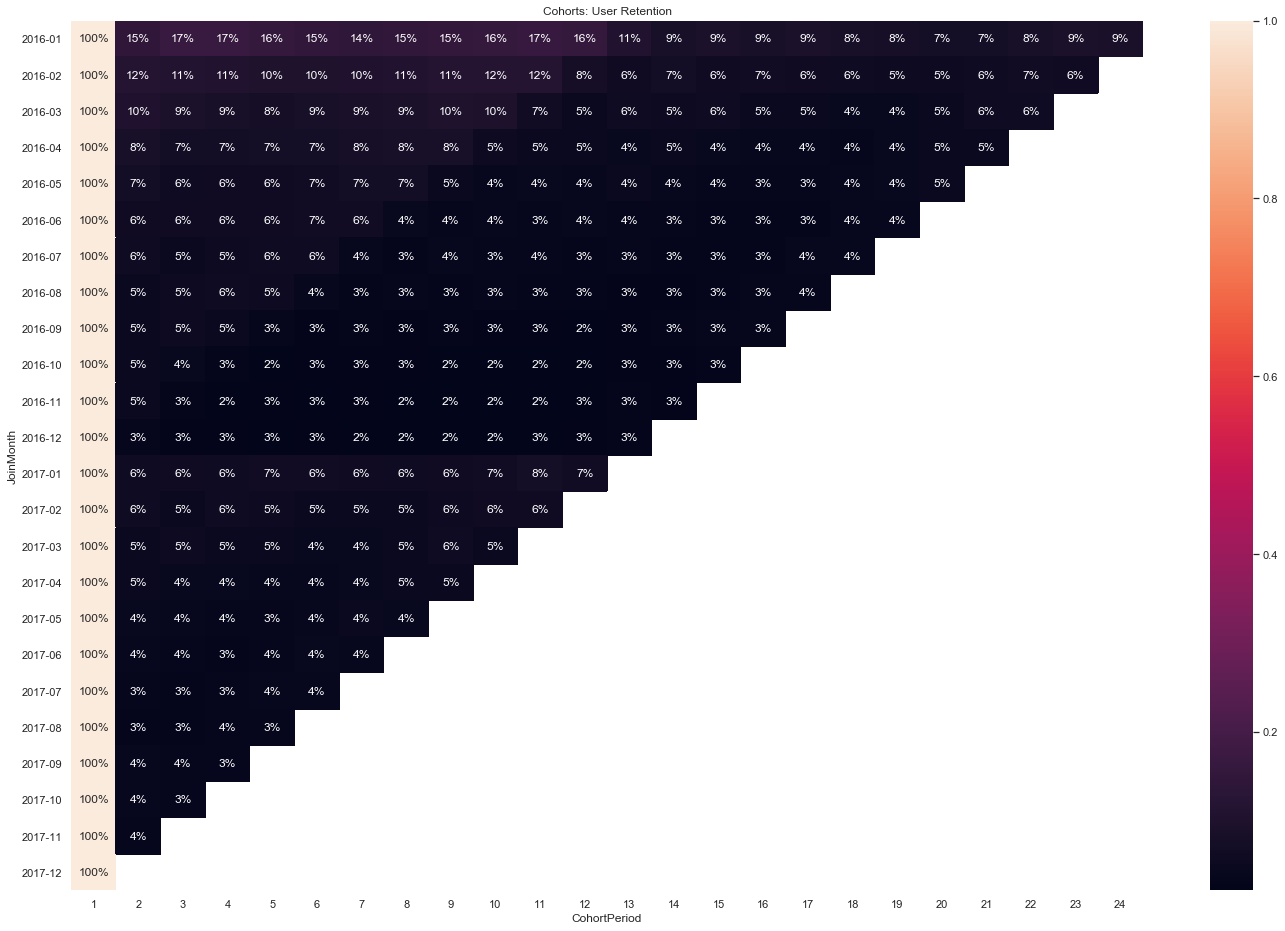

In [19]:
import seaborn as sns
sns.set(style='white')
plt.figure(figsize=(24, 16))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.0%');

### Коэффециенты поведения когроты по порядковому номеру месяца

In [64]:
mean_retention = round(user_retention.mean(axis=1), 5).to_frame()

In [65]:
mean_retention.reset_index(inplace=True)

In [66]:
mean_retention = mean_retention.rename(columns={0: 'mean_ret'})

добавим значение для 25 периода, как среднее за последние 4 месяца

In [69]:
mean_retention.loc[24] = [25, 0]
mean_retention.loc[24] = [int(25), round(mean_retention.loc[20:23, 'mean_ret'].mean(), 5)]

In [71]:
mean_retention

,CohortPeriod,mean_ret
0,1,1.00000
1,2,0.05858
2,3,0.05622
3,4,0.05598
4,5,0.05537
5,6,0.05567
6,7,0.05656
7,8,0.05734
8,9,0.05812
9,10,0.05645


#### P.S. 
Поскольку поведение когорты от месяца к месяцу имеет некоторую закономерность, но в тоже время имеются и выбросы (например, 2016-01), то, вероятно, логиченее было бы использовать не среднее арифметическое значение, а моду, там где повторяющихся значений достаточно много и медиану, там где значений мало.

### Прогноз товарооборота января 2018 года

создадим фрейм, содержащий стартовые суммы покупок когорт

In [13]:
cohorts_start = cohorts.loc[cohorts['CohortPeriod'] == 1, ['TotalPrice']].copy()

In [14]:
cohorts_start.reset_index(inplace=True)

In [15]:
cohorts_start

,JoinMonth,OrderPeriod,TotalPrice
0,2016-01,2016-01,1.125203e+08
1,2016-02,2016-02,7.665997e+07
2,2016-03,2016-03,8.933170e+07
3,2016-04,2016-04,8.750513e+07
4,2016-05,2016-05,7.742248e+07
5,2016-06,2016-06,6.891899e+07
6,2016-07,2016-07,7.151200e+07
7,2016-08,2016-08,8.323511e+07
8,2016-09,2016-09,8.469470e+07
9,2016-10,2016-10,1.064479e+08


In [72]:
cohorts_contribution = cohorts_start.copy()

вычислим товарооборот 2018-01 от новых участников (когорта 2018-01), считая что он соотносится к 2017-12, так же как 2017-01 к 2016-12, т.е. total_price(2016-12)*total_price(2017-12)/total_price(2016-12)

In [73]:
price_2018_01 = cohorts_contribution.loc[cohorts_contribution.JoinMonth == '2017-01', 'TotalPrice'].iloc[0]*\
                    cohorts_contribution.loc[cohorts_contribution.JoinMonth == '2017-12', 'TotalPrice'].iloc[0]/\
                        cohorts_contribution.loc[cohorts_contribution.JoinMonth == '2016-12', 'TotalPrice'].iloc[0]

In [74]:
cohorts_contribution.loc[24] = ['2018-01', '2018-01', price_2018_01]

In [75]:
cohorts_contribution

,JoinMonth,OrderPeriod,TotalPrice
0,2016-01,2016-01,1.125203e+08
1,2016-02,2016-02,7.665997e+07
2,2016-03,2016-03,8.933170e+07
3,2016-04,2016-04,8.750513e+07
4,2016-05,2016-05,7.742248e+07
5,2016-06,2016-06,6.891899e+07
6,2016-07,2016-07,7.151200e+07
7,2016-08,2016-08,8.323511e+07
8,2016-09,2016-09,8.469470e+07
9,2016-10,2016-10,1.064479e+08


In [78]:
cohorts_contribution['Contr_to_2017-01'] = np.nan

In [79]:
for i in range(25):
    cohorts_contribution['Contr_to_2017-01'][i] = cohorts_contribution.loc[i]['TotalPrice']*mean_retention.loc[24-i]['mean_ret']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [80]:
cohorts_contribution

,JoinMonth,OrderPeriod,TotalPrice,Contr_to_2017-01
0,2016-01,2016-01,1.125203e+08,8.228612e+06
1,2016-02,2016-02,7.665997e+07,6.779041e+06
2,2016-03,2016-03,8.933170e+07,6.889261e+06
3,2016-04,2016-04,8.750513e+07,5.997601e+06
4,2016-05,2016-05,7.742248e+07,4.523796e+06
5,2016-06,2016-06,6.891899e+07,3.749882e+06
6,2016-07,2016-07,7.151200e+07,3.555577e+06
7,2016-08,2016-08,8.323511e+07,4.003609e+06
8,2016-09,2016-09,8.469470e+07,3.966253e+06
9,2016-10,2016-10,1.064479e+08,4.817831e+06


In [81]:
x = cohorts_contribution['Contr_to_2017-01'].sum()

In [82]:
print(f'Товарооборот января 2018 года = {x}')

Товарооборот января 2018 года = 333672563.16312623
